In [17]:
#Etape 1 : Import des bibliothèques nécessaires

#NLP
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer

#Traitement des données
import pandas as pd

#Visulation des données
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go


#Autre
import numpy as np

#Gestion de la date
from datetime import datetime

#Matrice de confusion
from sklearn.metrics import confusion_matrix


In [37]:
#Etape 2 : Import des données 

#A changer en fonction du path du fichier csv
df = pd.read_csv("C:/Users/Paul/Desktop/Barcelonnette_sifter_ana_clean1-labellise-par-Pilar-Paul-Christian-Omar-ajoutdate2.csv",delimiter=';', encoding = "ISO-8859-1")



In [38]:
#Etape 3 Analyse par Textblob

#A) Déclaration des variables

#Récupération des variables d'intérêt
texts=df["Text"]
dates=df["[M] posted_time: "]

#Création de variables

#Les tweets concernant barcelonnettes sont réparties sur deux jours ( 7 et 8 avril ).
#Pour effectuer une étude il est donc nécessaire de connaitre le nombre de tweets positifs/négatifs/neutre
#selon l'heure du séisme. Cela explique la création des variables : positif, négatif, neutre
positif=[0 for k in range(48)]
negatif=[0 for k in range(48)]
neutre=[0 for k in range(48)]


#Ces variables permettrons de juger de la répartition des résultats donnés par textblob
nbpositiftotal=0
nbnegatiftotal=0
nbneutretotal=0

#De même en plus de la polarité du tweets, textblob est capable d'analyser sa subjectifivité.
objectif=[0 for k in range(48)]
nbobjectiftotal=0

#Ces variables seront utiles pour visualiser les graphiques. 
hours=[ k for k in range(48)]
numberhour=[0 for k in range(48)]

#Enfin cette variable permettra de stocker les résultats. 
Y_predict=[]


#B) Analyse des tweets

#On parcourt les tweets
for i in range(len(texts)) :
    d = datetime.strptime(dates[i], '%m/%d/%Y %H:%M')
    #On sépare les tweets en fonction du jour d'envoie du tweets
    if d.month==4 and d.day==7 and d.year==2014 :
        #Cette fonction crée l'objet analysable par Textblob (Vectorisation, tokenization etc ...)
        sentence = TextBlob(str(texts[i]), pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
        #On récupère la polarité et la sujectivité du tweet
        (a,b)=sentence.sentiment
        #En fonction de la polarité on attribue un résultat.
        if a>0 :
            positif[d.hour]+=1
            Y_predict+=[1]
            nbpositiftotal+=1
        if a==0 :
            neutre[d.hour]+=1
            Y_predict+=[2]
            nbneutretotal+=1
                
        if a<0 :
            negatif[d.hour]+=1
            Y_predict+=[0]
            nbnegatiftotal+=1
            
        if b<0.2 :
            objectif[d.hour]+=1
            nbobjectiftotal+=1
                
        numberhour[d.hour]+=1

    #De même.
    if d.month==4 and d.day==8 and d.year==2014 :
        sentence = TextBlob(str(texts[i]), pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
        (a,b)=sentence.sentiment
        if a>0 :
            positif[d.hour+24]+=1
            Y_predict+=[1]
            nbpositiftotal+=1
        if a==0 :
            neutre[d.hour+24]+=1
            Y_predict+=[2]
            nbneutretotal+=1
        if a<0 :
            negatif[d.hour+24]+=1
            Y_predict+=[0]
            nbnegatiftotal+=1
        if b<0.2 :
            objectif[d.hour+24]+=1
            nbobjectiftotal+=1
                
        numberhour[d.hour+24]+=1

# C) Traitement des résultats
#On normalise les tweets pour obtenir un résultat indépendant du nombre de tweets émis dans l'heure.
positifnormalise=[0 for k in range(48)]
negatifnormalise=[0 for k in range(48)]
neutrenormalise=[0 for k in range(48)]
objectifnormalise=[0 for k in range(48)]

for j in range(48):
    if numberhour[j]!=0:
        positifnormalise[j]=positif[j]/numberhour[j]
        neutrenormalise[j]=neutre[j]/numberhour[j]
        negatifnormalise[j]=negatif[j]/numberhour[j]
        objectifnormalise[j]=objectif[j]/numberhour[j]



In [40]:
#Etape 4 : Analyse des résultats 

#On récupère l'attribue label du dataframe
Y_labellise=df["Label"]

# Création de variable utile

#Score (comparaison entre les labels et les résultats renvoyées par Textblob)
nbbonsresultats=0

#Nombre de tweets que nous avons labellisé comme étant positif, négatif ou neutre
nbvraipositif=0
nbvraisnegatif=0
nbvraisneutre=0

#Nombre de tweets analysé par Textblob comme étant positif, négatif ou neutre
nbtextblobpositif=0
nbtextblobnegatif=0
nbtextblobneutre=0

for i in range(500):
    if Y_labellise[i]==Y_predict[i]:
        nbbonsresultats+=1
    if Y_labellise[i]==1:
        nbvraipositif+=1
    if Y_labellise[i]==0:
        nbvraisnegatif+=1
    if Y_labellise[i]==2:
        nbvraisneutre+=1
    if Y_predict[i]==1:
        nbtextblobpositif+=1
    if Y_predict[i]==0:
        nbtextblobnegatif+=1
    if Y_predict[i]==2:
        nbtextblobneutre+=1
        
        

pourcentage=nbbonsresultats/500
print("Analyse du score")
print("Nombre de tweets bien analysés",nbbonsresultats)
print("Pourcentage de tweets bien analysés",pourcentage)

print("")
#Les labels par textblob
print("Analyse de la labellisation par textblob")
print("Nombre de positif attribué",nbtextblobpositif)
print("Nombre de negatif attribué",nbtextblobnegatif)
print("Nombre de neutre attribué",nbtextblobneutre)

print("")
#Les labels que nous avons attribué
print("Analyse de notre labellisation")
print("Nombre de positif attribué",nbvraipositif)
print("Nombre de negatif attribué",nbvraisnegatif)
print("Nombre de neutre attribué",nbvraisneutre)
print("")
Y_labelliseint=[int(i) for i in (Y_labellise[0:499])]
Y_predictint=[int(i) for i in (Y_predict[0:499])]
confusion_matrix(Y_labelliseint,Y_predictint)




Analyse du score
Nombre de tweets bien analysés 180
Pourcentage de tweets bien analysés 0.36

Analyse de la labellisation par textblob
Nombre de positif attribué 175
Nombre de negatif attribué 63
Nombre de neutre attribué 262

Analyse de notre labellisation
Nombre de positif attribué 174
Nombre de negatif attribué 169
Nombre de neutre attribué 157



array([[26, 55, 87],
       [33, 60, 81],
       [ 4, 59, 94]], dtype=int64)

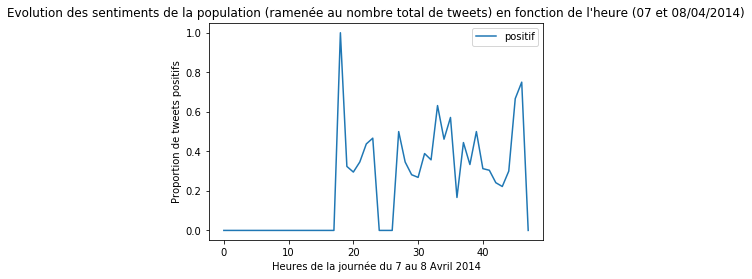

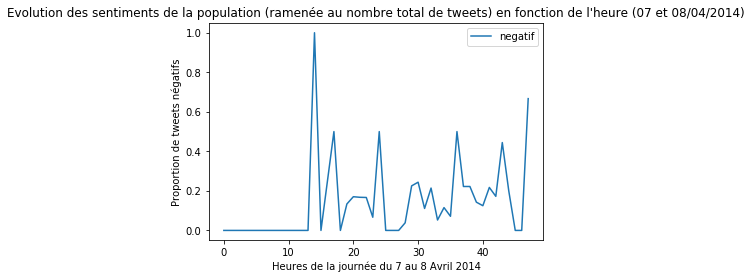

In [44]:
# Etape 5 : visualisation des résultats

plt.plot(hours,positifnormalise,label="positif")
plt.title("Evolution des sentiments de la population (ramenée au nombre total de tweets) en fonction de l'heure (07 et 08/04/2014)")
plt.xlabel("Heures de la journée du 7 au 8 Avril 2014")
plt.ylabel("Proportion de tweets positifs")
plt.legend()
plt.show()

plt.figure()
plt.plot(hours,negatifnormalise,label="negatif")
plt.title("Evolution des sentiments de la population (ramenée au nombre total de tweets) en fonction de l'heure (07 et 08/04/2014)")
plt.xlabel("Heures de la journée du 7 au 8 Avril 2014")
plt.ylabel("Proportion de tweets négatifs")
plt.legend()
plt.show()

plt.figure()
plt.plot(hours,objectifnormalise,label="objectif")
plt.title("Evolution des sentiments de la population (ramenée au nombre total de tweets) en fonction de l'heure (07 et 08/04/2014)")
plt.xlabel("Heures de la journée du 7 au 8 Avril 2014")
plt.ylabel("Proportion de tweets neutres")
plt.legend()
plt.show()
